# Blatt 3

Josephine Larissa Prochnow

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

## Problem 1

### a)

mean: 14.6 per hour -> $\overline{n}=$ 7.3 per half hour

Poisson: $w_n = \frac{\overline{n}^n}{n!} e^{-\overline{n}}$

Probability for less than 5: $\sum_{n=0}^4 w_n = 14.73$%

### b)
$\mu = \lambda$, $\sigma^2 = \lambda$

Gauß: $w_n = \sum_{i=0}^{4} \frac{1}{\sqrt{2\pi\lambda}} e^{-(x-\lambda)^2/(2\lambda)} =  14.68\%$

In [18]:
probability = 0
for i in range(5):
    w_i = 7.3**i/np.math.factorial(i) *np.exp(-7.3)
    print("w_{} = {}".format(i,w_i))
    probability += w_i
probability

w_0 = 0.0006755387751938444
w_1 = 0.004931433058915064
w_2 = 0.017999730665039983
w_3 = 0.043799344618263965
w_4 = 0.07993380392833173


0.1473398510457446

In [19]:
probability = 0
for i in range(5):
    w_i = 1/np.sqrt(2*np.pi*7.3) * np.exp(-(i-7.3)**2/(2*7.3))
    print("w_{} = {}".format(i,w_i))
    probability += w_i
probability

w_0 = 0.0038377243421523427
w_1 = 0.009741415357560944
w_2 = 0.02156144937486528
w_3 = 0.04161419002758216
w_4 = 0.07003458284829654


0.14678936195045728

## Problem 2

## Variance

### Uniform distribution:

$ p(x) = \begin{cases} \dfrac 1 L & -L/2 \le x \le L/2 \\ 0 & \text{sonst} \end{cases} $

$$
\text{Variance}(x) = \left(\int_{-L/2}^{+L/2} x^2 \frac{1}{L} dx\right) - \left( \int_{-L/2}^{+L/2} x \frac{1}{L} dx \right)^2
=
\frac{1}{3L} \left( 2\frac{L^3}{2^3} \right) = \frac{L^2}{12}$$

### Poisson distribution:
$w_n = \frac{\overline{n}^n}{n!} e^{-\overline{n}}$
$$\langle n (n-1) \rangle = \langle n^2 \rangle - \langle n \rangle = \langle n^2 \rangle - \overline{n}$$
$$\langle n (n-1) \rangle = \sum_{n=0}^{\infty} n(n-1) \frac{\overline{n}^n e^{-\overline{n}}}{n!} = e^{-\overline{n}}\sum_{n=2}^{\infty} \frac{\overline{n}^n }{(n-2)!} \\ = e^{-\overline{n}}\overline{n}^{2}\sum_{n=2}^{\infty} \frac{\overline{n}^{n-2} }{(n-2)!}   = e^{-\overline{n}}\overline{n}^{2}\sum_{n=0}^{\infty} \frac{\overline{n}^{n} }{(n)!} = e^{-\overline{n}}\overline{n}^{2} e^{\overline{n}} = \overline{n}^{2}
$$

$$\text{Variance}(x) = \langle n^2 \rangle - \langle n \rangle^2 = \overline{n}^{2} + \overline{n} - \overline{n}^2 = \overline{n}$$

## Problem 3

the objective of the exercise is to measure the weighted mean temperature per bin of 10 years.

1. Create a function to read the data.
2. Plot the data.
Hint: Look at the errorbar (or fill between) methods of matplotlib (similar to
plot).
3. Create a weighted mean method that will measure the weighted mean and its associated
error.
4. Plot the evolution of the temperature base on this weighted mean data.

Data must be displayed with their errors

In [20]:
colspecs = [(2, 6), (10, 12), (14, 22), (24, 29), (31, 39), (41, 46), (48, 56), (58, 63), (65, 73), (75, 80), (82, 90), (92, 97)]
data = pd.read_fwf(
    "BerkeleyEarth_GlobalLandTemperature.dat",
    colspecs=colspecs, 
    header=53
)
data.columns = ["year", "month", "monthly Anomaly", "monthly unc.", "annual Anomaly", "annual unc.", "five_year Anomaly", "five-year unc.", "ten-year Anomaly", "ten-year unc.", "twenty-year Anomaly", "twenty-year unc."]
data

,year,month,monthly Anomaly,monthly unc.,annual Anomaly,annual unc.,five_year Anomaly,five-year unc.,ten-year Anomaly,ten-year unc.,twenty-year Anomaly,twenty-year unc.
0,1833,1,-4.449,3.234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1833,2,1.267,3.641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1833,3,-0.059,2.443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1833,4,-0.749,1.446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1833,5,3.412,1.421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2163,2013,4,0.565,0.108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,2013,5,0.809,0.198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2165,2013,6,1.187,0.107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2166,2013,7,0.723,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data['year,month'] = data['year'].astype(str) + ',' + data['month'].astype(str)

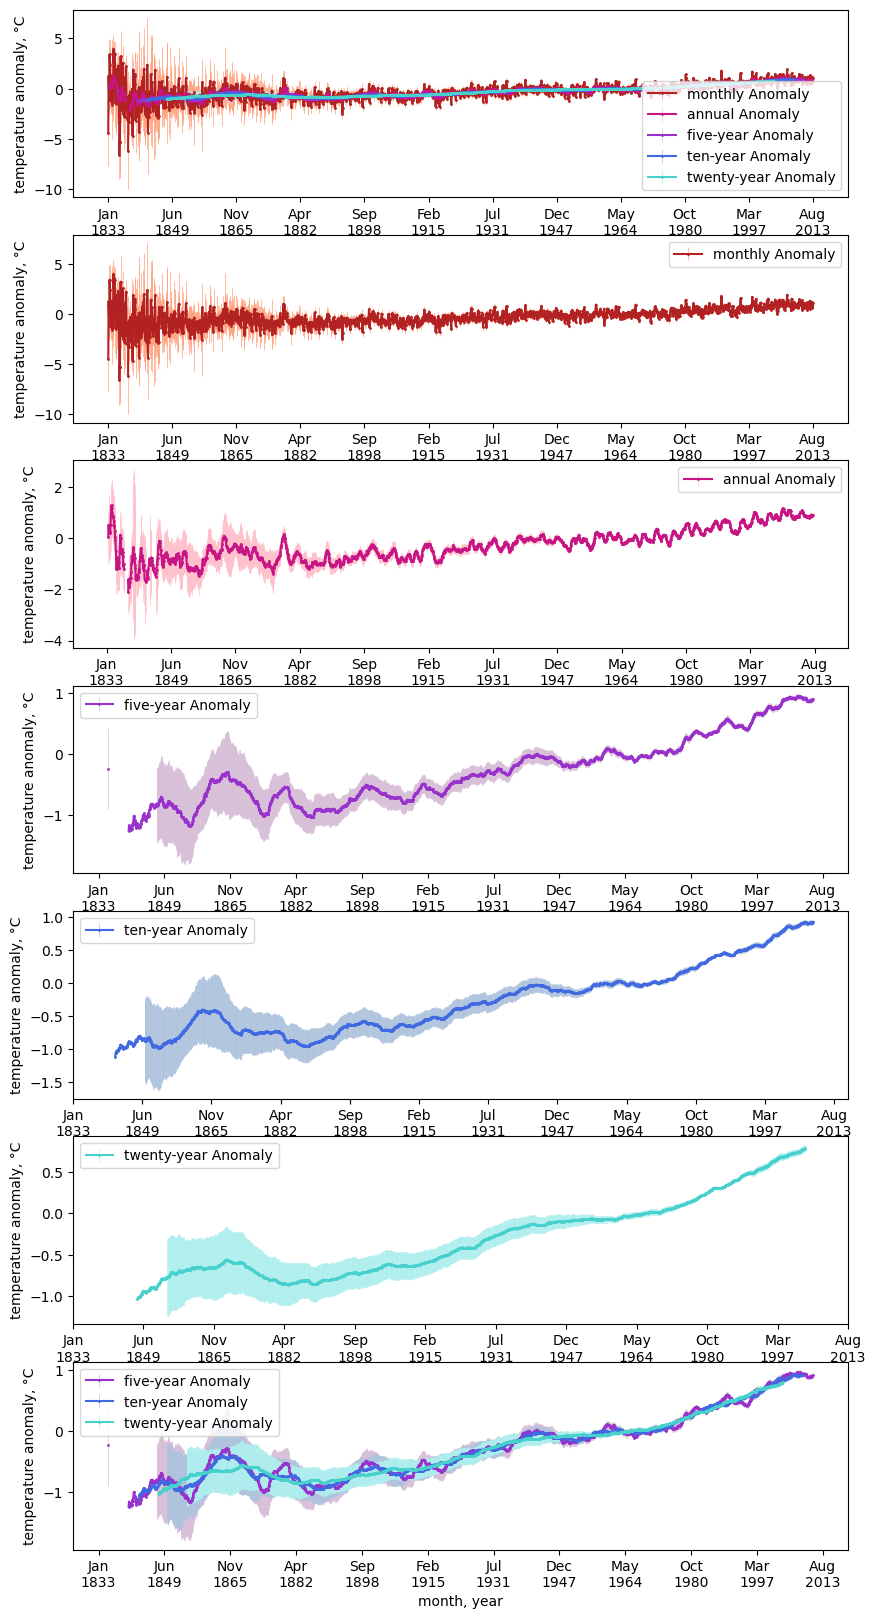

In [22]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axs = plt.subplots(7,1,figsize=(10, 20))
kwargs = dict(marker='.', capsize=0, markersize=2 ,elinewidth=0.5, capthick=0.25)

x = range(0, len(data['year,month']))
axs[0].errorbar(x, data['monthly Anomaly'].to_numpy(),yerr=data['monthly unc.'].to_numpy(), label='monthly Anomaly', ecolor='lightsalmon',color='firebrick', **kwargs)
axs[0].errorbar(x, data['annual Anomaly'].to_numpy(),yerr=data['annual unc.'].to_numpy(), label='annual Anomaly', ecolor='pink',color='mediumvioletred', **kwargs)
axs[0].errorbar(x, data['five_year Anomaly'].to_numpy(),yerr=data['five-year unc.'].to_numpy(), label='five-year Anomaly', ecolor='thistle',color='darkorchid', **kwargs)
axs[0].errorbar(x, data['ten-year Anomaly'].to_numpy(),yerr=data['ten-year unc.'].to_numpy(), label='ten-year Anomaly', ecolor='lightsteelblue',color='royalblue', **kwargs)
axs[0].errorbar(x, data['twenty-year Anomaly'].to_numpy(),yerr=data['twenty-year unc.'].to_numpy(), label='twenty-year Anomaly', ecolor='paleturquoise',color='mediumturquoise', **kwargs)

axs[1].errorbar(x, data['monthly Anomaly'].to_numpy(),yerr=data['monthly unc.'].to_numpy(), label='monthly Anomaly', ecolor='lightsalmon',color='firebrick', **kwargs)
axs[2].errorbar(x, data['annual Anomaly'].to_numpy(),yerr=data['annual unc.'].to_numpy(), label='annual Anomaly', ecolor='pink',color='mediumvioletred', **kwargs)
axs[3].errorbar(x, data['five_year Anomaly'].to_numpy(),yerr=data['five-year unc.'].to_numpy(), label='five-year Anomaly', ecolor='thistle',color='darkorchid', **kwargs)
axs[4].errorbar(x, data['ten-year Anomaly'].to_numpy(),yerr=data['ten-year unc.'].to_numpy(), label='ten-year Anomaly', ecolor='lightsteelblue',color='royalblue', **kwargs)
axs[5].errorbar(x, data['twenty-year Anomaly'].to_numpy(),yerr=data['twenty-year unc.'].to_numpy(), label='twenty-year Anomaly', ecolor='paleturquoise',color='mediumturquoise', **kwargs)

axs[6].errorbar(x, data['five_year Anomaly'].to_numpy(),yerr=data['five-year unc.'].to_numpy(), label='five-year Anomaly', ecolor='thistle',color='darkorchid', **kwargs)
axs[6].errorbar(x, data['ten-year Anomaly'].to_numpy(),yerr=data['ten-year unc.'].to_numpy(), label='ten-year Anomaly', ecolor='lightsteelblue',color='royalblue', **kwargs)
axs[6].errorbar(x, data['twenty-year Anomaly'].to_numpy(),yerr=data['twenty-year unc.'].to_numpy(), label='twenty-year Anomaly', ecolor='paleturquoise',color='mediumturquoise', **kwargs)

A = len(data['year,month'])-1
B = A/11
for i in range(7):
    axs[i].legend()
    axs[i].set_xlabel("month, year")
    axs[i].set_ylabel("temperature anomaly, °C")
    #axs[i].tick_params(axis='x', labelrotation=90, which='major', reset=True)
    axs[i].set_xticks(np.linspace(0,A, 12),
        labels=[f"{month[data['month'][B*j]-1]}\n{data['year'][B*j]}" for j in range(12)])
plt.show()

$ \mu_\text{weighted} = \frac{1}{\sum_{k} w_k} \sum_{i} w_ix_i$

$w_i = \frac{1}{u_i^2}$

error propagation: $ \text{unc} = \sqrt{\sum_i \left( \frac{\partial \mu_\text{weighted}}{\partial x_i} u_i \right)^2} =  \sqrt{\sum_i \left( \frac{w_i}{\sum_{k} w_k} u_i \right)^2} =  \sqrt{\sum_i \left( \frac{1}{\sum_{k} \frac{1}{u_k^2}} \frac{1}{u_i} \right)^2} =  \sqrt{  \frac{\sum_i \frac{1}{u_i^2}}{\left(\sum_{k} \frac{1}{u_k^2}\right)^2}  } =  \sqrt{  \sum_{k} \frac{1}{u_k^2} }$



In [23]:
def weighted_mean(data, uncertainty):
    mean = np.nansum(data/uncertainty**2)/np.nansum(1/uncertainty**2)
    unc = np.sqrt(1/np.nansum(1/uncertainty**2))
    return mean, unc

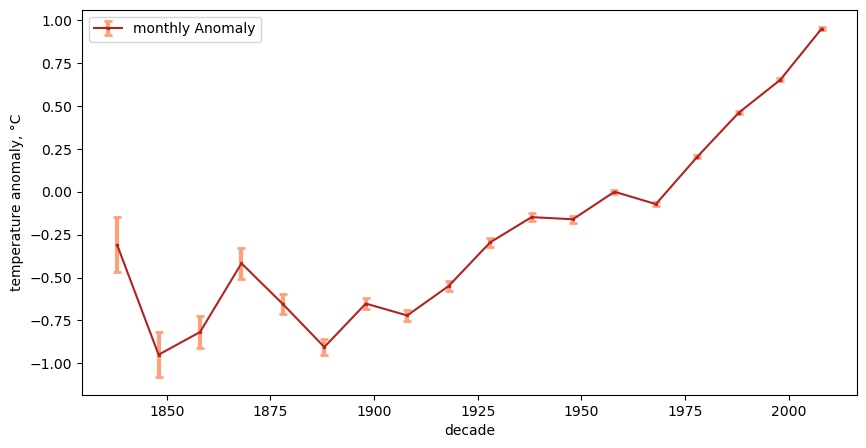

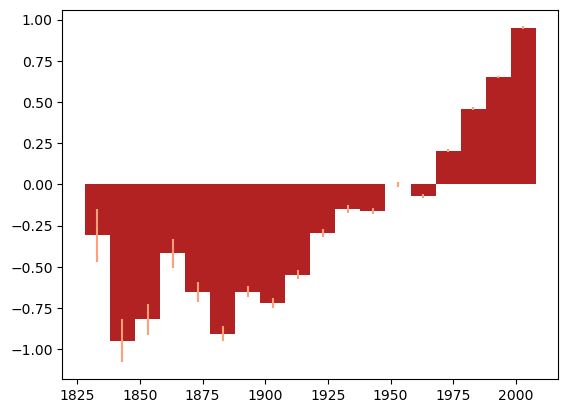

In [24]:
bars = []
years = []
years0=[]
i = 12*10
for j in range(int(len(data['monthly Anomaly'])/120)):
    #print(data['year'][i*j+5*12],data['monthly Anomaly'][j*i])
    years0.append(data['year'][i*j+5*12])
    years.append(data['year'][i*j])
    X = weighted_mean(data['monthly Anomaly'][j*i:i*(j+1)].to_numpy(), data['monthly unc.'][j*i:i*(j+1)].to_numpy())
    bars.append(X)

bars = np.array(bars)
#print(bars)
kwargs = dict(marker='.', capsize=3, markersize=3 ,elinewidth=3, capthick=2)
fig, axs = plt.subplots(1,1,figsize=(10, 5))
axs.errorbar(years0, bars[:,0],yerr=bars[:,1], label='monthly Anomaly', ecolor='lightsalmon',color='firebrick', **kwargs)
axs.legend()
axs.set_xlabel("decade")
axs.set_ylabel("temperature anomaly, °C")
plt.show()

plt.bar(years,bars[:,0], width=10, yerr=bars[:,1], label='monthly Anomaly', ecolor='lightsalmon',color='firebrick')
plt.show()
